In [20]:
import scipy.linalg
import matplotlib.pyplot as plt
import numpy as np
import statistics
import timeit
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import semicircular
from numba import jit

In [21]:
### Problem 0, Part A
num_matrix = 100
size_matrix = 1000
eig_total = np.zeros((num_matrix, size_matrix))

for i in range(num_matrix):
    tmp = np.random.normal(loc=0.0, scale=1.0, size=[size_matrix, size_matrix])
    mat =  (tmp + tmp.T)/np.sqrt(2) 
    mat = mat - (np.sqrt(2) - 1)*np.diag(np.diagonal(tmp)) # Generate symmetric matrix
    eig_total[i, :] = scipy.linalg.eigh(mat,eigvals_only=True)
    
eig_total = eig_total.flatten()

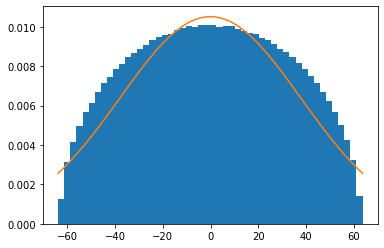

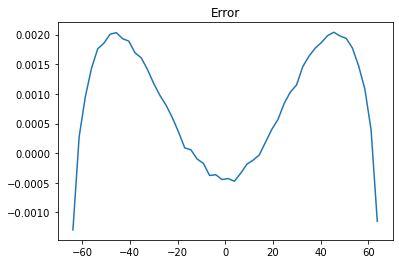

In [22]:
#Try with normal
plt.figure()
n, bins, patches = plt.hist(eig_total, bins=50, density=True)


# Plot between the starting of bins ot the end with 50 steps.
x_axis = np.linspace(bins[0], bins[-1], len(bins)-1) 
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
# plotting the normal curve
plt.show()
difference = n - norm.pdf(x_axis, mean, sd)
plt.plot(x_axis, difference)
# plotting the difference curve
plt.title("Error")
plt.show()

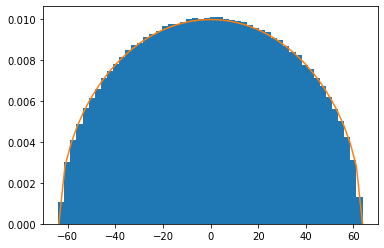

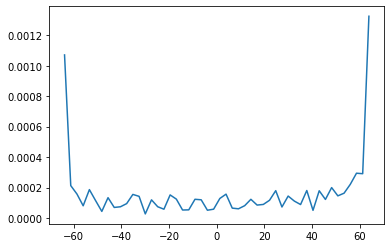

In [7]:
#Try with semicircle
plt.figure()
n, bins, patches = plt.hist(eig_total, bins=50, density=True)


# Plot between the starting of bins ot the end with 50 steps.
x_axis = np.linspace(semicircular.ppf(0.00, loc = 0, scale = max(eig_total)),
                    semicircular.ppf(1.00, loc = 0, scale = max(eig_total)),
                    50) 
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
y = semicircular.pdf(x_axis,loc = 0, scale = max(eig_total))
plt.plot(x_axis, y)
# plotting the semicircular curve
plt.show()
difference = abs(n - y)
plt.plot(x_axis, difference)
# plotting the difference curve
plt.title("Error")
plt.show()


This is for size = 200


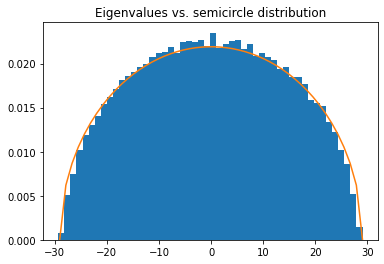

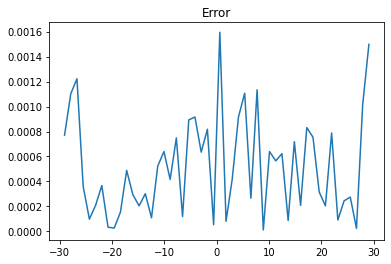

This is for size = 400


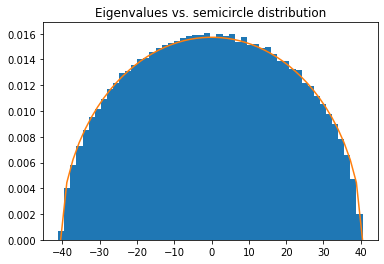

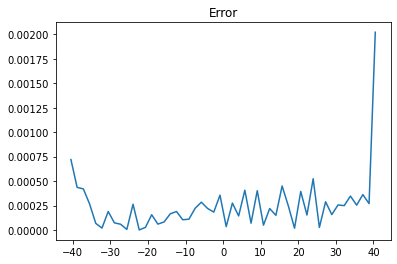

This is for size = 800


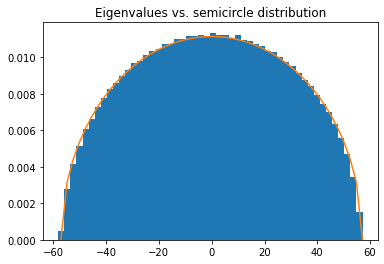

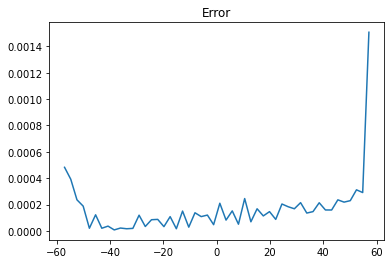

This is for size = 1600


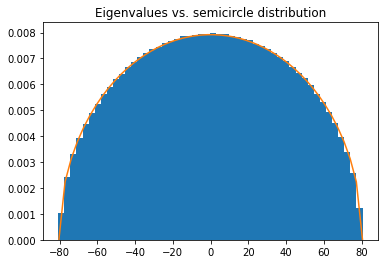

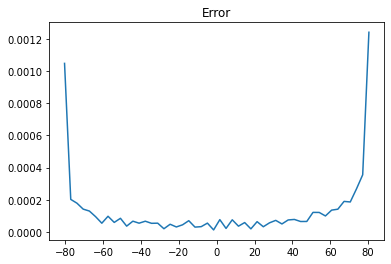

In [8]:
### Problem 0, Part A
num_matrix = 100
sizelist = [200, 400, 800, 1600]
for j in range(4):
    size_matrix = sizelist[j]
    eig_total = np.zeros((num_matrix, size_matrix))

    for i in range(num_matrix):
        tmp = np.random.normal(loc=0.0, scale=1.0, size=[size_matrix, size_matrix])
        mat =  (tmp + tmp.T)/np.sqrt(2) 
        mat = mat - (np.sqrt(2) - 1)*np.diag(np.diagonal(tmp)) # Generate symmetric matrix
        eig_total[i, :] = scipy.linalg.eigh(mat,eigvals_only=True)

    eig_total = eig_total.flatten()
    print("This is for size = {}".format(size_matrix))
    plt.figure()
    n, bins, patches = plt.hist(eig_total, bins=50, density=True)


    # Plot between the starting of bins ot the end with 50 steps.
    x_axis = np.linspace(semicircular.ppf(0.00, loc = 0, scale = max(eig_total)),
                        semicircular.ppf(1.00, loc = 0, scale = max(eig_total)),
                        50) 

    # Calculating mean and standard deviation
    mean = statistics.mean(x_axis)
    sd = statistics.stdev(x_axis)
    y = semicircular.pdf(x_axis,loc = 0, scale = max(eig_total))
    plt.plot(x_axis, y)
    # plotting the semicircular curve
    plt.title("Eigenvalues vs. semicircle distribution")
    plt.show()
    difference = abs(n - y)
    plt.plot(x_axis, difference)
    # plotting the difference curve
    plt.title("Error")
    plt.show()


In [23]:
### Problem 0, Part B
num_matrix = 1000
size_matrix = 200
eig_max = np.zeros(num_matrix)

for i in range(num_matrix):
    tmp = np.random.normal(loc=0.0, scale=1.0, size=[size_matrix, size_matrix])
    mat =  (tmp + tmp.T)/np.sqrt(2) 
    mat = mat - (np.sqrt(2) - 1)*np.diag(np.diagonal(tmp)) # Generate symmetric matrix
    eig_max[i] = max(scipy.linalg.eigh(mat,eigvals_only=True))


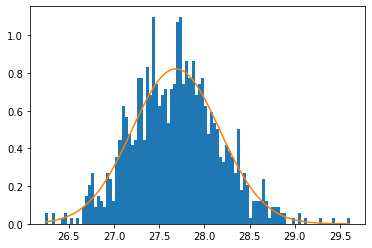

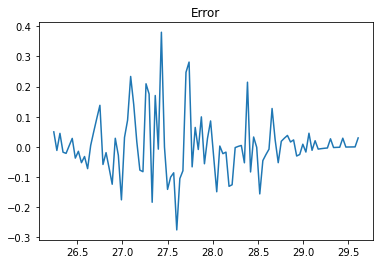

In [24]:
plt.figure()
n, bins, patches = plt.hist(eig_max, bins=100, density=True)

# Plot between the starting of bins ot the end with proper steps.
x_axis = np.linspace(bins[0], bins[-1], len(bins)-1) 
  
# Calculating mean and standard deviation
mean, sd = norm.fit(eig_max)
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
# plotting the normal curve
plt.show()
difference = n - norm.pdf(x_axis, mean, sd)
plt.plot(x_axis, difference)
# plotting the difference curve
plt.title("Error")
plt.show()

In [25]:
### Problem 0, Part C
num_matrix = 1000
size_matrix = 200
eig_total = np.zeros(num_matrix)
eig_diff = np.zeros(num_matrix-1)
eig_diffmax = np.zeros(num_matrix)

for i in range(num_matrix):
    tmp = np.random.normal(loc=0.0, scale=1.0, size=[size_matrix, size_matrix])
    mat =  (tmp + tmp.T)/np.sqrt(2) 
    mat = mat - (np.sqrt(2) - 1)*np.diag(np.diagonal(tmp)) # Generate symmetric matrix
    eig_total = scipy.linalg.eigh(mat,eigvals_only=True) 
    eig_diffmax[i] = max(eig_total[1:]-eig_total[:-1])
    #calculating the max of gaps by creating the sequence of difference, using array operation

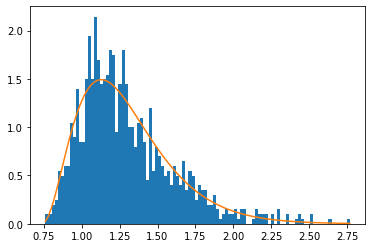

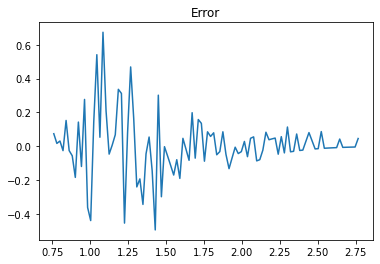

In [26]:
plt.figure()
n, bins, patches = plt.hist(eig_diffmax, bins=100, density=True)

# Plot between the starting of bins ot the end with proper steps.
x_axis = np.linspace(bins[0], bins[-1], len(bins)-1) 
  
# Calculating mean and standard deviation
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(eig_diffmax)
  
plt.plot(x_axis, stats.gamma.pdf(x_axis, fit_alpha, fit_loc, fit_beta))
# plotting the normal curve
plt.show()
difference = n - stats.gamma.pdf(x_axis, fit_alpha, fit_loc, fit_beta)
plt.plot(x_axis, difference)
# plotting the difference curve
plt.title("Error")
plt.show()

This is for size = 200


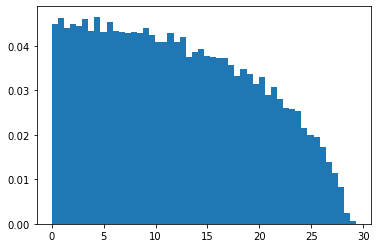

This is for size = 400


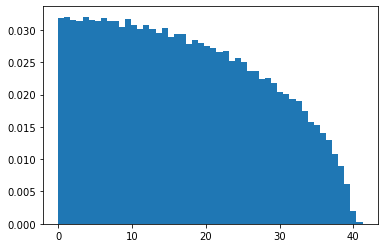

This is for size = 800


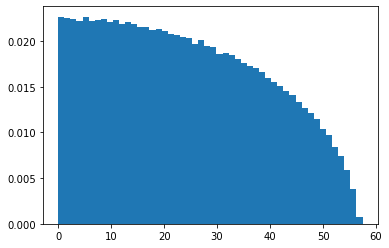

This is for size = 1600


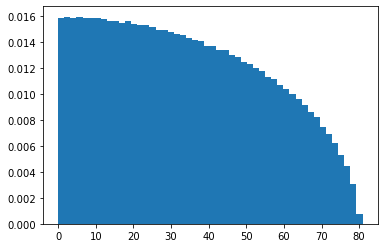

In [32]:
### Problem 0, Part D
num_matrix = 100
sizelist = [200, 400, 800, 1600]
for j in range(4):
    size_matrix = sizelist[j]
    singlist = np.zeros((num_matrix, size_matrix))


    for i in range(num_matrix):
        tmp = np.random.normal(loc=0.0, scale=1.0, size=[size_matrix, size_matrix])
        mat =  (tmp + tmp.T)/np.sqrt(2) 
        mat = mat - (np.sqrt(2) - 1)*np.diag(np.diagonal(tmp)) # Generate symmetric matrix
        U, S, Vt = scipy.linalg.svd(mat)
        singlist[i,:] = S
    
    singlist = singlist.flatten()
    print("This is for size = {}".format(size_matrix))
    plt.figure()
    n, bins, patches = plt.hist(singlist, bins=50, density=True)
    plt.show()

In [23]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        I had it from this website: https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting
    
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

This is for size = 200


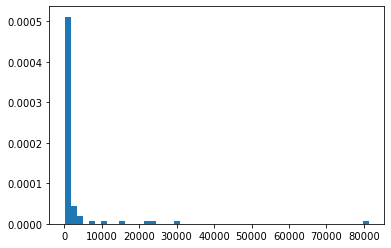

This is for size = 400


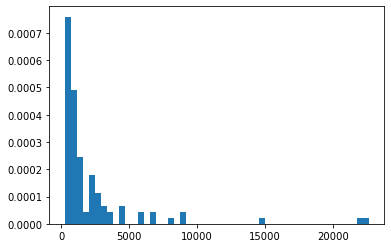

In [51]:
### Problem 0, Part E
#Version before kicked out the outliers.
num_matrix = 100
sizelist = [200, 400]
for j in range(len(sizelist)):
    size_matrix = sizelist[j]
    condnumber = np.zeros(num_matrix)
    tol = 1e-8

    for i in range(num_matrix):
        tmp = np.random.normal(loc=0.0, scale=1.0, size=[size_matrix, size_matrix])
        mat =  (tmp + tmp.T)/np.sqrt(2) 
        mat = mat - (np.sqrt(2) - 1)*np.diag(np.diagonal(tmp)) # Generate symmetric matrix
        U, S, Vt = scipy.linalg.svd(mat)
        smallest = min(S)
        if smallest < tol:
            pass
        condnumber[i] = max(S)/smallest
        # This is to eliminate outliers that occur because some smallest singular value is 0 or very close to 0

    print("This is for size = {}".format(size_matrix))
    plt.figure()
    n, bins, patches = plt.hist(condnumber, bins=50, density=True)
    plt.show()

C:\Users\y\AppData\Local\Temp/ipykernel_27084/1582983642.py:32: RuntimeWarning: divide by zero encountered in true_divide
  modified_z_score = 0.6745 * diff / med_abs_deviation
C:\Users\y\AppData\Local\Temp/ipykernel_27084/1582983642.py:32: RuntimeWarning: invalid value encountered in true_divide
  modified_z_score = 0.6745 * diff / med_abs_deviation


This is for size = 200


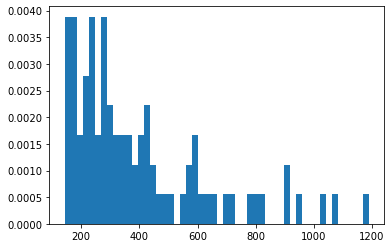

This is for size = 400


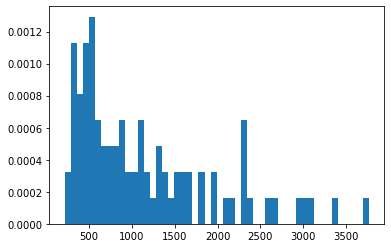

In [34]:
### Problem 0, Part E
#Version when kicked out the outliers.
num_matrix = 100
sizelist = [200, 400]
for j in range(len(sizelist)):
    size_matrix = sizelist[j]
    condnumber = np.zeros(num_matrix)
    tol = 1e-8

    for i in range(num_matrix):
        tmp = np.random.normal(loc=0.0, scale=1.0, size=[size_matrix, size_matrix])
        mat =  (tmp + tmp.T)/np.sqrt(2) 
        mat = mat - (np.sqrt(2) - 1)*np.diag(np.diagonal(tmp)) # Generate symmetric matrix
        U, S, Vt = scipy.linalg.svd(mat)
        smallest = min(S)
        if smallest < tol:
            pass
        condnumber[i] = max(S)/smallest
        condtrue = condnumber[~is_outlier(condnumber)]
        # This is to eliminate outliers that occur because some smallest singular value is 0 or very close to 0

    print("This is for size = {}".format(size_matrix))
    plt.figure()
    n, bins, patches = plt.hist(condtrue, bins=50, density=True)
    plt.show()

In [59]:
### Problem 1 part A
[a,b,c] = np.random.normal(loc=0.0, scale=1.0, size=3)
C = np.array([[a,b],[b,c]])
theta = np.arctan2(b,(c-a)/2)/2
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])
H = R@C@(R.T)
print(H)


[[-9.99200380e-01 -5.55111512e-17]
 [-8.32667268e-17  1.76595254e-01]]


In [60]:
def prob1(A):
    '''
    Input an nxn matrix, returns the largest value that is not on the diagonal.
    '''
    if A.shape[1] != A.shape[0]:
        return "Please enter a square matrix."
    def check_symmetric(a, tol=1e-8):
        return np.all(np.abs(a-a.T) < tol)
    if check_symmetric(A) == False:
        return "Please enter a symmetric matrix."
    n = A.shape[0]
    largest = 0
    #This gives us the largest non-diagonal value
    for j in range(n):
        #loop on columns first due to memory accessment.
        for i in range(n):
            if i!=j:
                if abs(A[i,j]) > largest:
                    largest = abs(A[i,j])
                    p1 = i
                    p2 = j
    # The largest non-diagonal value is largest, it's position is real_pos.
    real_pos = [p1+1,p2+1]
    pos = [p1,p2]
    #print(pos)
    [a,b,c] = [A[p1,p1],A[p1,p2],A[p2,p2]]
    C = np.array([[a,b],[b,c]])
    theta = np.arctan2(b,(c-a)/2)/2
    R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    W = np.identity(n)
    W[p1,p1] = R[0,0]
    W[p1,p2] = R[0,1]
    W[p2,p1] = R[1,0]
    W[p2,p2] = R[1,1]
    H = W@A@(W.T)
    return H

T = np.array([[1,2,3], [2,4,5], [3,5,6]])
F = prob1(T)
print(F)
E_1 = scipy.linalg.eigh(T,eigvals_only=True)
E_2 = scipy.linalg.eigh(F,eigvals_only=True)
print(E_1-E_2)

[[ 1.00000000e+00  3.58800424e+00  3.55282434e-01]
 [ 3.58800424e+00  1.00990195e+01 -6.51939133e-16]
 [ 3.55282434e-01 -2.55254558e-16 -9.90195136e-02]]
[ 1.11022302e-16 -3.49720253e-15 -7.10542736e-15]


The time taken is : 0.01796569999987696
[[ 1.70915189e-01 -9.29718553e-16  9.49373006e-16]
 [-1.03145182e-15 -5.15729472e-01  3.15467521e-09]
 [ 1.18243863e-15  3.15467554e-09  1.13448143e+01]]


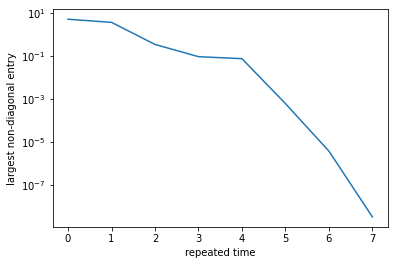

In [37]:
def probc(A,tol = 1e-8):
    n = A.shape[0]
    largest = 0
    for j in range(n):
        #loop on columns first due to memory accessment.
        for i in range(n):
            if i!=j:
                if abs(A[i,j]) > largest:
                    largest = abs(A[i,j])
                    p1 = i
                    p2 = j
    Largestlist = []
    #This list records the largest non daigonal element of the matrix.
    while largest > tol:
        A = prob1(A)
        Largestlist.append(largest)
        largest = 0
        for j in range(n):
        #loop on columns first due to memory accessment.
            for i in range(n):
                if i!=j:
                    if abs(A[i,j]) > largest:
                        largest = abs(A[i,j])
                        p1 = i
                        p2 = j
    Largestlist.append(largest)
    plt.semilogy(Largestlist)
    plt.xlabel("repeated time")
    plt.ylabel("largest non-diagonal entry")
    return A

T = np.array([[1,2,3], [2,4,5], [3,5,6]])
starttime = timeit.default_timer()
F = probc(T)
print("The time taken is :", timeit.default_timer() - starttime)
print(F)

The time taken is : 0.03055060000042431
[[-3.98240172e+00  5.49083475e-09  2.14999648e-09  2.32700198e-14
   7.49077565e-12 -1.82631696e-11  7.62570377e-09  4.65700770e-09
  -1.90599418e-15  9.91401601e-09]
 [ 5.49083487e-09  1.90486254e+00  5.65813707e-17  1.93866163e-19
   4.45209760e-14 -1.43296323e-11 -5.44992614e-16 -4.04728080e-15
   1.37249472e-16  3.49195695e-16]
 [ 2.14999659e-09  1.73243464e-16 -2.82044519e+00  4.84640516e-16
   7.19952205e-17  3.58680676e-10 -6.23326228e-24 -4.59144204e-13
  -3.30392490e-09 -3.94059035e-15]
 [ 2.34233404e-14 -1.45739067e-16  4.10901620e-16  1.13663260e+00
  -9.11066735e-14  4.87455148e-11 -1.10358177e-14  2.98206560e-10
  -3.86703715e-11  5.10836142e-16]
 [ 7.49075881e-12  4.46529338e-14 -5.55224074e-17 -9.09878537e-14
  -1.45455321e+00  3.61845176e-16 -4.11463261e-09 -3.10227805e-10
   7.98374543e-11 -4.15297783e-10]
 [-1.82631754e-11 -1.43297509e-11  3.58680636e-10  4.87454976e-11
   3.02678985e-16  8.88227782e-01  3.60940788e-15 -7.039647

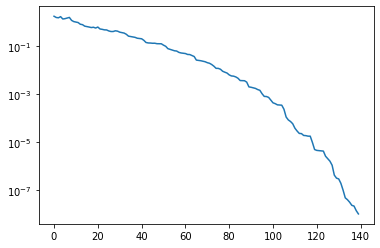

In [35]:
tmp = np.random.normal(loc=0.0, scale=1.0, size=[10, 10])
mat =  (tmp + tmp.T)/np.sqrt(2) 
mat = mat - (np.sqrt(2) - 1)*np.diag(np.diagonal(tmp)) # Generate symmetric matrix
starttime = timeit.default_timer()
SS = probc(mat)
print("The time taken is :", timeit.default_timer() - starttime)
print(SS)
print("Graph shows that it's quadratic convergence.")

The time taken is : 133.63166850000016
Graph shows that it's quadratic convergence.


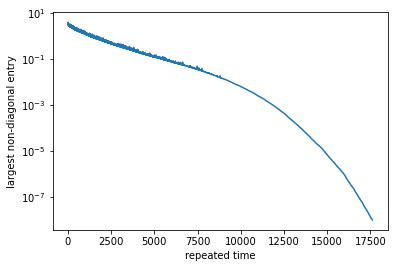

In [38]:
tmp = np.random.normal(loc=0.0, scale=1.0, size=[100, 100])
mat =  (tmp + tmp.T)/np.sqrt(2) 
mat = mat - (np.sqrt(2) - 1)*np.diag(np.diagonal(tmp)) # Generate symmetric matrix
starttime = timeit.default_timer()
SS = probc(mat)
print("The time taken is :", timeit.default_timer() - starttime)
print("Graph shows that it's quadratic convergence.")

In [61]:
@jit(nopython=True) # throws error if not able to compile
#Used numba to precompile the process of finding the largest non-diagonal entry. 
#This step is repeated thousands of time so it should speed things up.
def numba_find_largest_ND(A,n):
    """
    This finds the largest non-diagonal entry.
    We enter the size of A since I don't want to compute it again.
    """
    largest = 0
    for j in range(n):
        #loop on columns first due to memory accessment.
        for i in range(n):
            if i!=j:
                if abs(A[i,j]) > largest:
                    largest = abs(A[i,j])
                    pp1 = i
                    pp2 = j
    return largest,pp1,pp2

In [62]:
def Modified(A):
    '''
    Input an nxn matrix, returns the largest value that is not on the diagonal.
    '''
    #Since checking symmetric matrix is slow, I do it only once, in Modified_C, but not for each small function.
    n = A.shape[0]
    [largest_val,p1,p2] = numba_find_largest_ND(A,n)
    # The largest non-diagonal value is largest, it's position is real_pos.
    real_pos = [p1+1,p2+1]
    pos = [p1,p2]
    #print(pos)
    [a,b,c] = [A[p1,p1],A[p1,p2],A[p2,p2]]
    C = np.array([[a,b],[b,c]])
    theta = np.arctan2(b,(c-a)/2)/2
    R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    W = np.identity(n)
    W[p1,p1] = R[0,0]
    W[p1,p2] = R[0,1]
    W[p2,p1] = R[1,0]
    W[p2,p2] = R[1,1]
    H = W@A@(W.T)
    return H

T = np.array([[1,2,3], [2,4,5], [3,5,6]])
F = Modified(T)
print(F)
E_1 = scipy.linalg.eigh(T,eigvals_only=True)
E_2 = scipy.linalg.eigh(F,eigvals_only=True)
print(E_1-E_2)

[[ 1.00000000e+00  3.58800424e+00  3.55282434e-01]
 [ 3.58800424e+00  1.00990195e+01 -6.51939133e-16]
 [ 3.55282434e-01 -2.55254558e-16 -9.90195136e-02]]
[ 1.11022302e-16 -3.49720253e-15 -7.10542736e-15]


The time taken is : 0.12006110000038461
[[ 1.70915189e-01 -9.29718553e-16  9.49373006e-16]
 [-1.03145182e-15 -5.15729472e-01  3.15467521e-09]
 [ 1.18243863e-15  3.15467554e-09  1.13448143e+01]]


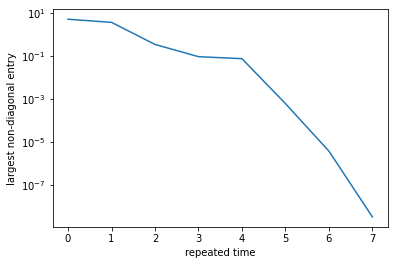

In [63]:
def Modified_C(A,tol = 1e-8):
    if A.shape[1] != A.shape[0]:
        return "Please enter a square matrix."
    def check_symmetric(a, tol=1e-8):
        return np.all(np.abs(a-a.T) < tol)
    if check_symmetric(A) == False:
        return "Please enter a symmetric matrix."
    n = A.shape[0]
    [largest_val,p1,p2] = numba_find_largest_ND(A,n)
    Largestlist = []
    #This list records the largest non daigonal element of the matrix.
    while largest_val > tol:
        A = Modified(A)
        Largestlist.append(largest_val)
        largest_val = 0
        [largest_val,p1,p2] = numba_find_largest_ND(A,n)
    Largestlist.append(largest_val)
    plt.semilogy(Largestlist)
    plt.xlabel("repeated time")
    plt.ylabel("largest non-diagonal entry")
    return A

T = np.array([[1,2,3], [2,4,5], [3,5,6]])
starttime = timeit.default_timer()
F = Modified_C(T)
print("The time taken is :", timeit.default_timer() - starttime)
print(F)

The time taken is : 2.440619799999695
Graph shows that it's quadratic convergence.


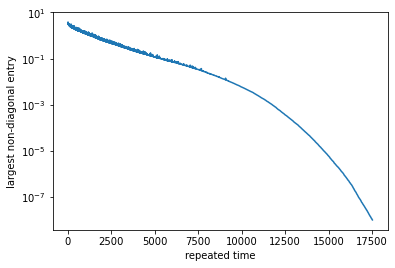

In [105]:
tmp = np.random.normal(loc=0.0, scale=1.0, size=[100, 100])
mat =  (tmp + tmp.T)/np.sqrt(2) 
mat = mat - (np.sqrt(2) - 1)*np.diag(np.diagonal(tmp)) # Generate symmetric matrix
starttime = timeit.default_timer()
SS = Modified_C(mat)
print("The time taken is :", timeit.default_timer() - starttime)
print("Graph shows that it's quadratic convergence.")

In [99]:
@jit(nopython=True) # throws error if not able to compile
#Used numba to precompile the process of finding the next step. 
#This step is repeated thousands of time so it should speed things up, but it uses numpy already so I'm not sure whether this will help much.
def numba_find_next_matrix(A,a,b,c,n,p1,p2):
    """
    This finds the largest non-diagonal entry.
    We enter the size of A since I don't want to compute it again.
    """
    C = np.array([[a,b],[b,c]])
    theta = np.arctan2(b,(c-a)/2)/2
    R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    W = np.identity(n)
    W[p1,p1] = R[0,0]
    W[p1,p2] = R[0,1]
    W[p2,p1] = R[1,0]
    W[p2,p2] = R[1,1]
    return W

In [100]:
def Modified_v2(A):
    '''
    Input an nxn matrix, returns the largest value that is not on the diagonal.
    '''
    #Since checking symmetric matrix is slow, I do it only once, in Modified_C, but not for each small function.
    n = A.shape[0]
    [largest_val,p1,p2] = numba_find_largest_ND(A,n)
    # The largest non-diagonal value is largest, it's position is real_pos.
    real_pos = [p1+1,p2+1]
    pos = [p1,p2]
    #print(pos)
    [a,b,c] = [A[p1,p1],A[p1,p2],A[p2,p2]]
    W = numba_find_next_matrix(A,a,b,c,n,p1,p2)
    H = W@A@(W.T)
    return H

T = np.array([[1,2,3], [2,4,5], [3,5,6]])
F = Modified(T)
print(F)
E_1 = scipy.linalg.eigh(T,eigvals_only=True)
E_2 = scipy.linalg.eigh(F,eigvals_only=True)
print(E_1-E_2)

[[ 1.00000000e+00  3.58800424e+00  3.55282434e-01]
 [ 3.58800424e+00  1.00990195e+01 -6.51939133e-16]
 [ 3.55282434e-01 -2.55254558e-16 -9.90195136e-02]]
[ 1.11022302e-16 -3.49720253e-15 -7.10542736e-15]


The time taken is : 1.2155745000000024
[[ 1.70915189e-01 -9.29718553e-16  9.49373006e-16]
 [-1.03145182e-15 -5.15729472e-01  3.15467521e-09]
 [ 1.18243863e-15  3.15467554e-09  1.13448143e+01]]


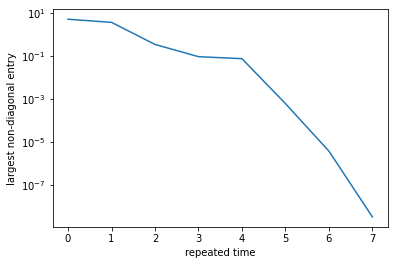

In [101]:
def Modified_C_v2(A,tol = 1e-8):
    if A.shape[1] != A.shape[0]:
        return "Please enter a square matrix."
    def check_symmetric(a, tol=1e-8):
        return np.all(np.abs(a-a.T) < tol)
    if check_symmetric(A) == False:
        return "Please enter a symmetric matrix."
    n = A.shape[0]
    [largest_val,p1,p2] = numba_find_largest_ND(A,n)
    Largestlist = []
    #This list records the largest non daigonal element of the matrix.
    while largest_val > tol:
        A = Modified_v2(A)
        Largestlist.append(largest_val)
        largest_val = 0
        [largest_val,p1,p2] = numba_find_largest_ND(A,n)
    Largestlist.append(largest_val)
    plt.semilogy(Largestlist)
    plt.xlabel("repeated time")
    plt.ylabel("largest non-diagonal entry")
    return A

T = np.array([[1,2,3], [2,4,5], [3,5,6]])
starttime = timeit.default_timer()
F = Modified_C_v2(T)
print("The time taken is :", timeit.default_timer() - starttime)
print(F)

The time taken is : 2.130716499999835
Graph shows that it's quadratic convergence.


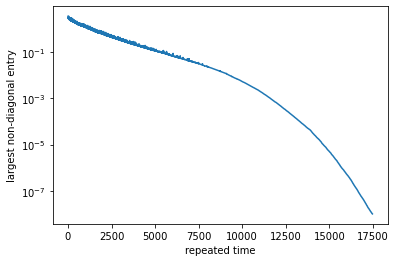

In [103]:
tmp = np.random.normal(loc=0.0, scale=1.0, size=[100, 100])
mat =  (tmp + tmp.T)/np.sqrt(2) 
mat = mat - (np.sqrt(2) - 1)*np.diag(np.diagonal(tmp)) # Generate symmetric matrix
starttime = timeit.default_timer()
SS = Modified_C_v2(mat)
print("The time taken is :", timeit.default_timer() - starttime)
print("Graph shows that it's quadratic convergence.")